<a href="https://colab.research.google.com/github/AbirRaufun/Machine-learning/blob/main/Dog%20Vs%20Cat%20classification/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information:
SHEIKH ABIR ISLAM
abirraufun1234@gmail.com

In [ ]:
#installing kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

using Kaggle API

In [6]:
#API
!kaggle competitions download -c dogs-vs-cats

In [7]:
#extract full
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
#extract train
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [9]:
#counting images
import os
path, dirs , files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [ ]:
#printing name if all images
import os
for filename in os.listdir("/content/train"):
  print(filename)

Library

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display Image

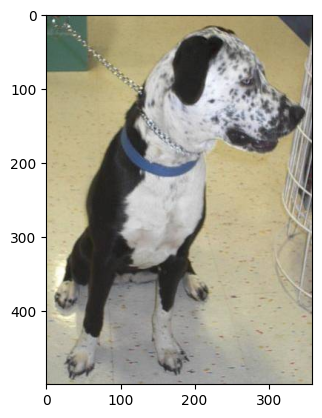

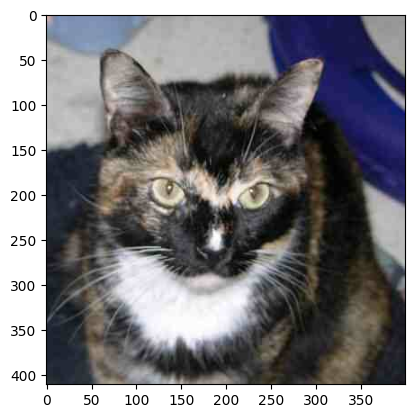

In [12]:
#Example of Dog
img = mpimg.imread('/content/train/dog.4072.jpg')
imgplot = plt.imshow(img)
plt.show()
#Example of cat
img = mpimg.imread('/content/train/cat.3598.jpg')
imgplot = plt.imshow(img)
plt.show()

Counting DOG and Cat images

In [13]:
file_name=os.listdir("/content/train")
dog_count=0
cat_count=0
for i in file_name:
  if i.startswith("dog"):
    dog_count+=1
  else:
    cat_count+=1
print(dog_count)
print(cat_count)

12500
12500


# Creat dir and Resizing

In [14]:
import os

resized_dir = "/content/Image resized"
if not os.path.exists(resized_dir):
    os.mkdir(resized_dir)

In [15]:
Main_fol= '/content/train'
resize_fol= '/content/Image resized'

for i in range(3000):
  filename= os.listdir(Main_fol)[i]
  img_path= os.path.join(Main_fol, filename)
  img =Image.open(img_path)
  img= img.resize((224,224))
  img=img.convert('RGB')
  newimgpath= os.path.join(resize_fol, filename)
  img.save(newimgpath)

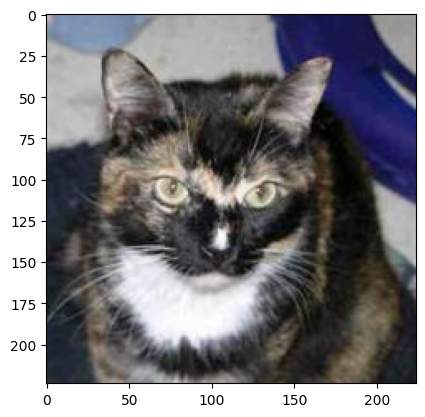

In [16]:
#display resize images
img = mpimg.imread('/content/Image resized/cat.3598.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating labels for resized images
---

*   Dog-->1
*   Cat-->0






In [17]:
#assign labels
filename=os.listdir("/content/Image resized/")
labels=[]
for i in range(3000):
  file_name=filename[i]
  label=file_name[0:3] # like dog and cat 3 char
  if label=="dog":
    labels.append(1)
  else:
    labels.append(0)

comparing labels

In [18]:
print(filename[0:5])
print(len(filename))

['cat.3598.jpg', 'cat.11499.jpg', 'cat.3820.jpg', 'dog.10744.jpg', 'cat.6023.jpg']
3000


In [19]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
3000


Counting dogs and cats out of 3000 images

In [20]:
values, counts=np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1560 1440]


Converting all resize images into numpy arrays

In [21]:
import cv2
import glob

In [22]:
image_directory= '/content/Image resized/'
image_extension= ['png', 'jpg', 'jpeg']
files=[]
[files.extend(glob.glob(image_directory + '*.' + e )) for e in image_extension]
dog_cat_img=np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_img)

In [24]:
type(dog_cat_img)
print(dog_cat_img.shape)

(3000, 224, 224, 3)


Assigning X and Y

In [25]:
X=dog_cat_img
Y=np.asarray(labels)

Train test spilit

In [26]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


scaling
* values 0 to 1

In [28]:
#scaling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_train_scaled)

**Using tensorflow mobilenet pretrained model for Transfer learning**
--
**Building NN**

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [33]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Load feature extractor
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    mobilenet_url,
    input_shape=(224, 224, 3),
    trainable=False
)

# Lambda workaround to fix symbolic tensor error
def extract_features(x):
    return feature_extractor_layer(x)

# Build model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Lambda(extract_features)(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,226 (641.51 KB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 0 (0.00 B)

# Tranning with Transfer learning

In [34]:
history_mobilenet = model.fit(X_train_scaled, Y_train, epochs=10, validation_data=(X_test_scaled, Y_test))


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9132 - loss: 0.1807 - val_accuracy: 0.9767 - val_loss: 0.0712
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9874 - loss: 0.0385 - val_accuracy: 0.9767 - val_loss: 0.0748
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9914 - loss: 0.0221 - val_accuracy: 0.9783 - val_loss: 0.0853
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9963 - loss: 0.0140 - val_accuracy: 0.9833 - val_loss: 0.0651
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9998 - loss: 0.0041 - val_accuracy: 0.9850 - val_loss: 0.0624
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.9850 - val_loss: 0.0684
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9850 - val_loss: 0.0666
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 1.0000 - loss: 6.9488e-04 - val_accuracy: 0.9850

In [74]:
#save the model of TF
model.save('model_mobilenet.h5')

**Tranning with CNN**
---

In [40]:
from tensorflow.keras import layers, models

In [41]:
# Build a CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer with 2 classes (dog or cat)
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Model summary
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,098 (42.47 MB)

 Trainable params: 11,132,098 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#save the model of CNN
model.save('model_cnn.h5')

In [42]:
# Train the CNN model
history_cnn = model_cnn.fit(X_train_scaled, Y_train, epochs=10, validation_data=(X_test_scaled, Y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.5065 - loss: 1.3140 - val_accuracy: 0.5750 - val_loss: 0.6907
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.5902 - loss: 0.6768 - val_accuracy: 0.6100 - val_loss: 0.6537
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.6841 - loss: 0.6077 - val_accuracy: 0.6217 - val_loss: 0.6637
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.7440 - loss: 0.4857 - val_accuracy: 0.6283 - val_loss: 0.7152
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8562 - loss: 0.3339 - val_accuracy: 0.5933 - val_loss: 0.9188
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9193 - loss: 0.1996 - val_accuracy: 0.6033 - val_loss: 1.4707
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9682 - loss: 0.0950 - val_accuracy: 0.6017 - val_loss: 1.8973
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.9884 - loss: 0.0456 - val_accuracy: 0.6033 - v

**Analyze Underfitting/Overfitting**
---

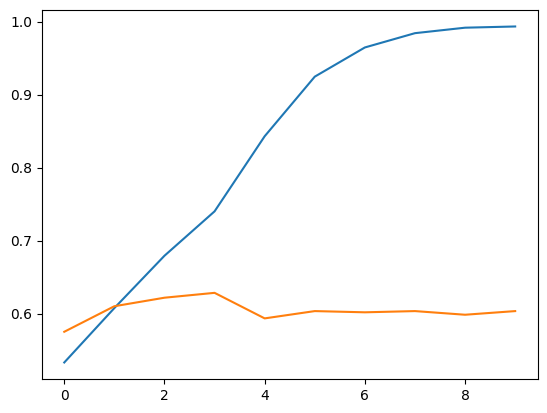

In [43]:
# Plotting training and validation accuracy for CNN
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')

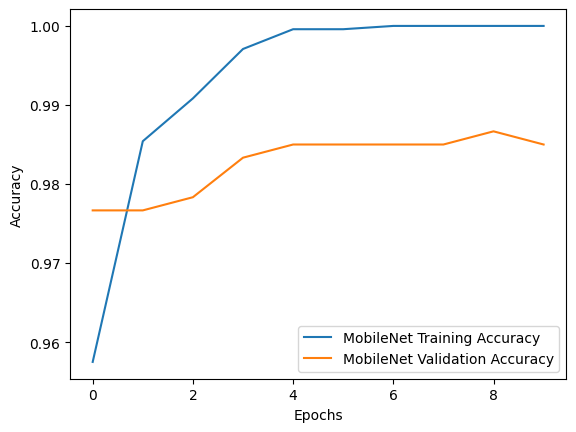

In [45]:
# Plotting training and validation accuracy for MobileNet
plt.plot(history_mobilenet.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

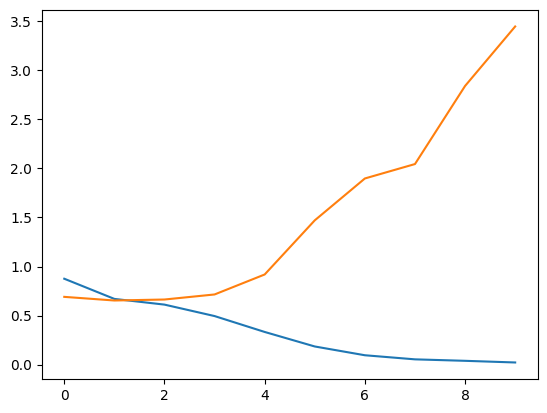

In [46]:
# Plotting training and validation loss for CNN
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')

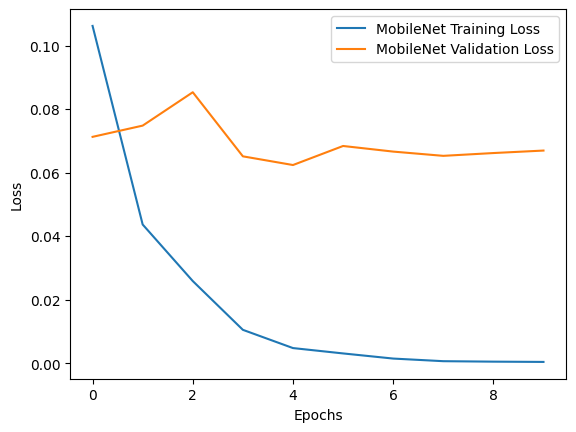

In [48]:
# Plotting training and validation loss for MobileNet
plt.plot(history_mobilenet.history['loss'], label='MobileNet Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='MobileNet Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluate Metrics (Accuracy, Precision, Recall, F1 Score)**
---

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [50]:
# Predict on the test set
Y_pred_cnn = model_cnn.predict(X_test_scaled)
Y_pred_cnn = np.argmax(Y_pred_cnn, axis=1)  # Convert to class labels

Y_pred_mobilenet = model.predict(X_test_scaled)
Y_pred_mobilenet = np.argmax(Y_pred_mobilenet, axis=1)  # Convert to class labels


19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


In [51]:
# Calculate metrics for CNN
print("CNN Performance Metrics:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_cnn)}")
print(f"Precision: {precision_score(Y_test, Y_pred_cnn)}")
print(f"Recall: {recall_score(Y_test, Y_pred_cnn)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_cnn)}")

CNN Performance Metrics:
Accuracy: 0.6033333333333334
Precision: 0.5719063545150501
Recall: 0.608540925266904
F1 Score: 0.5896551724137931


In [52]:
# Calculate metrics for MobileNet
print("MobileNet Performance Metrics:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_mobilenet)}")
print(f"Precision: {precision_score(Y_test, Y_pred_mobilenet)}")
print(f"Recall: {recall_score(Y_test, Y_pred_mobilenet)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_mobilenet)}")

MobileNet Performance Metrics:
Accuracy: 0.985
Precision: 0.9857142857142858
Recall: 0.9822064056939501
F1 Score: 0.983957219251337


**Predictive System**
----

In [91]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import layers
import tensorflow_hub as hub

In [98]:
# feature extraction function
def extract_features(x):
    return feature_extractor_layer(x)

# custom function
get_custom_objects().update({'extract_features': extract_features})
model.save('model_mobilenet.h5')

In [102]:
# Load models
cnn_model = load_model('model_cnn.h5', custom_objects={'extract_features': extract_features})
tl_model = load_model('model_mobilenet.h5', custom_objects={'extract_features': extract_features})
model.save('model_mobilenet.h5')

Path of the image to be predicted: /content/cat.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step

CNN Model Prediction: 
✅ CNN Model: The image is a cat
CNN Confidence: [1.0000000e+00 2.6495788e-09]

Transfer Learning Model Prediction: 
✅ Transfer Learning Model: The image is a cat
Transfer Learning Confidence: [1.0000000e+00 2.6495788e-09]


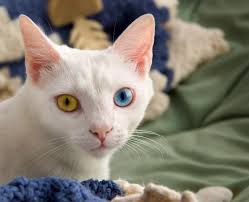

In [105]:
# Load the models ensuring the custom function is available
cnn_model = load_model('model_cnn.h5', custom_objects={'extract_features': extract_features})
tl_model = load_model('model_mobilenet.h5', custom_objects={'extract_features': extract_features})

# Get the image path
import_img_path = input('Path of the image to be predicted: ')
input_img = cv2.imread(import_img_path)


if input_img is None:
    print("Error: Image not found. Please check the path.")
else:

    input_img_resize = cv2.resize(input_img, (224, 224))
    input_img_scaled = input_img_resize / 255.0
    input_img_reshape = np.reshape(input_img_scaled, [1, 224, 224, 3])


    cnn_prediction = cnn_model.predict(input_img_reshape)
    tl_prediction = tl_model.predict(input_img_reshape)

    # CNN model
    cnn_confidence = np.max(cnn_prediction)
    cnn_predicted_class = np.argmax(cnn_prediction)

    #Transfer Learning model
    tl_confidence = np.max(tl_prediction)
    tl_predicted_class = np.argmax(tl_prediction)

    # Display CNN model
    print(f"\nCNN Model Prediction: ")
    if cnn_confidence < 0.7:
        print("⚠️ Not confident: Possibly not a cat or dog.")
    else:
        print('✅ CNN Model: The image is a cat' if cnn_predicted_class == 0 else '✅ CNN Model: The image is a dog')
    print(f"CNN Confidence: {cnn_prediction[0]}")

    # Display Transfer Learning model
    print(f"\nTransfer Learning Model Prediction: ")
    if tl_confidence < 0.7:
        print("⚠️ Not confident: Possibly not a cat or dog.")
    else:
        print('✅ Transfer Learning Model: The image is a cat' if tl_predicted_class == 0 else '✅ Transfer Learning Model: The image is a dog')
    print(f"Transfer Learning Confidence: {tl_prediction[0]}")

    # Show the image
    cv2_imshow(input_img)